In [ ]:
!pip install statsmodels

In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


df = pd.read_csv("energy_data.xls")


df['timestamp'] = pd.to_datetime(df['timestamp'])

df = df.set_index('timestamp')

In [27]:
average_load = df['total_power'].mean()
peak_load = df['total_power'].max()

load_factor = average_load / peak_load

print("Average Load:", average_load)
print("Peak Load:", peak_load)
print("Load Factor:", round(load_factor,3))

Average Load: 1019.5507984262902
Peak Load: 3757
Load Factor: 0.271


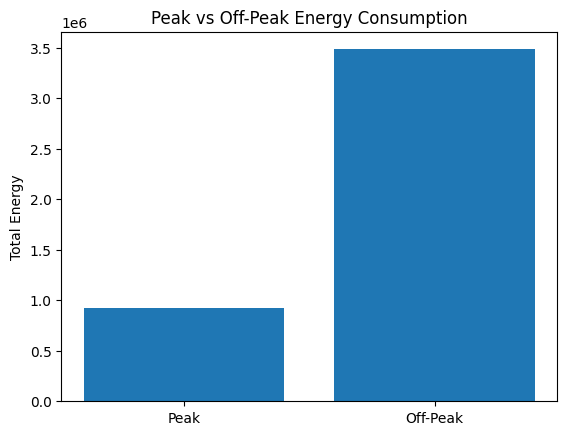

In [28]:
df['hour'] = df.index.hour

peak_hours = df[(df['hour'] >= 18) & (df['hour'] <= 22)]
off_peak = df[(df['hour'] < 18) | (df['hour'] > 22)]

peak_total = peak_hours['total_power'].sum()
off_peak_total = off_peak['total_power'].sum()

plt.bar(['Peak','Off-Peak'], [peak_total, off_peak_total])
plt.title("Peak vs Off-Peak Energy Consumption")
plt.ylabel("Total Energy")
plt.show()

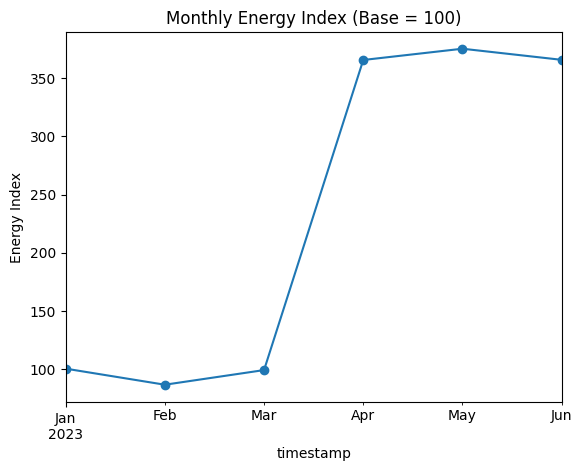

In [29]:
monthly_energy = df['total_power'].resample('ME').sum()

energy_index = (monthly_energy / monthly_energy.iloc[0]) * 100

energy_index.plot(marker='o')
plt.title("Monthly Energy Index (Base = 100)")
plt.ylabel("Energy Index")
plt.show()

In [36]:

mean_power = df['total_power'].mean()
median_power = df['total_power'].median()
std_power = df['total_power'].std()
skew_power = df['total_power'].skew()
kurt_power = df['total_power'].kurt()

print("Mean:", mean_power)
print("Median:", median_power)
print("Standard Deviation:", std_power)
print("Skewness:", skew_power)
print("Kurtosis:", kurt_power)

Mean: 1019.5507984262902
Median: 989.0
Standard Deviation: 976.0174405388728
Skewness: 0.4810111609017424
Kurtosis: -1.1445444171055263


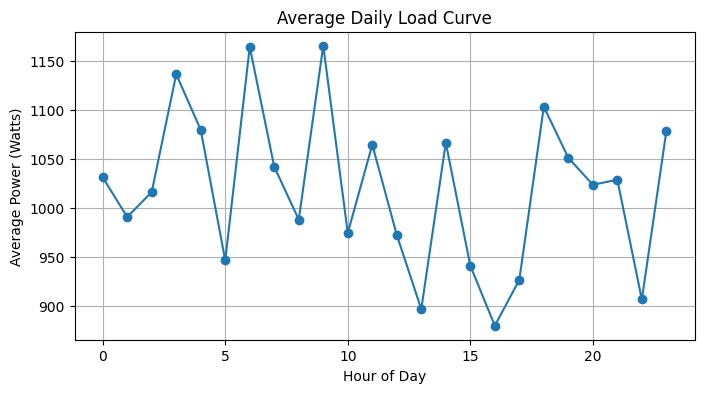

In [21]:
daily_shape = df.groupby(df.index.hour)['total_power'].mean()

plt.figure(figsize=(8,4))
plt.plot(daily_shape, marker='o')
plt.title("Average Daily Load Curve")
plt.xlabel("Hour of Day")
plt.ylabel("Average Power (Watts)")
plt.grid(True)
plt.show()

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df['total_power'], model='additive', period=24)

seasonal_strength = 1 - (np.var(decomp.resid) / np.var(decomp.seasonal + decomp.resid))

print("Seasonal Strength:", round(seasonal_strength,3))

Seasonal Strength: 0.011


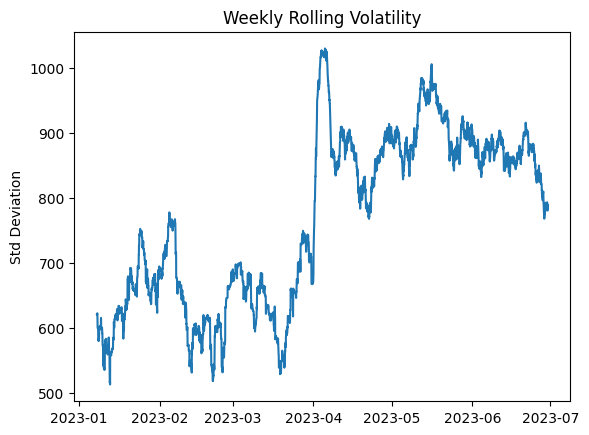

In [31]:
rolling_std = df['total_power'].rolling(168).std()

plt.plot(rolling_std)
plt.title("Weekly Rolling Volatility")
plt.ylabel("Std Deviation")
plt.show()

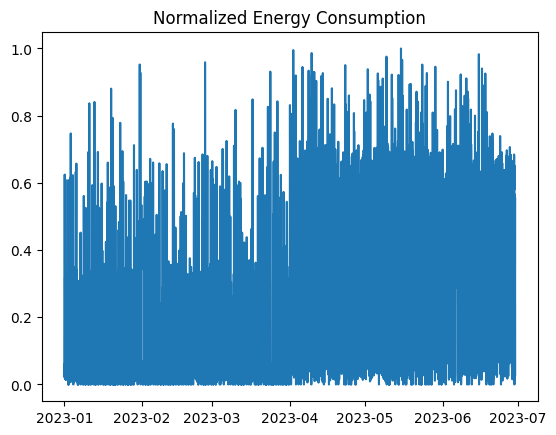

In [32]:
normalized = (df['total_power'] - df['total_power'].min()) / \
             (df['total_power'].max() - df['total_power'].min())

plt.plot(normalized)
plt.title("Normalized Energy Consumption")
plt.show()

In [37]:
monthly_stats = df['total_power'].resample('ME').agg(['sum','mean','std','max','min'])

monthly_stats

,sum,mean,std,max,min
timestamp,,,,,
2023-01-31,316388,425.252688,659.449387,3578,0
2023-02-28,272576,405.619048,623.980282,3603,0
2023-03-31,312482,420.002688,644.457855,3498,0
2023-04-30,1157642,1607.836111,866.639571,3739,0
2023-05-31,1188334,1597.223118,905.612006,3757,0
2023-06-30,1158057,1661.487805,851.618788,3693,0


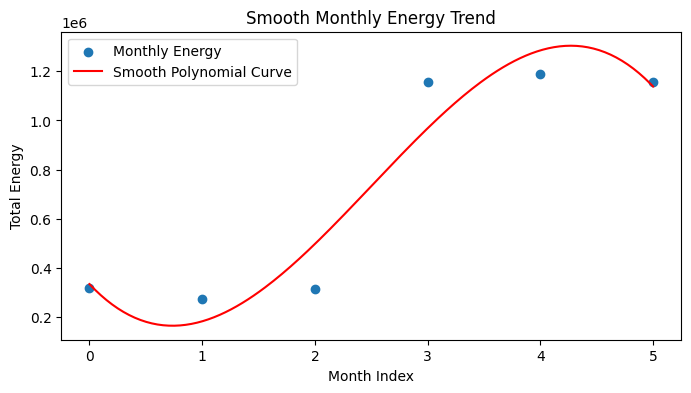

In [22]:
monthly_energy = df['total_power'].resample('ME').sum()

x = np.arange(len(monthly_energy))
y = monthly_energy.values

coeffs = np.polyfit(x, y, 3)
poly = np.poly1d(coeffs)

x_smooth = np.linspace(x.min(), x.max(), 200)
y_smooth = poly(x_smooth)

plt.figure(figsize=(8,4))
plt.scatter(x, y, label="Monthly Energy")
plt.plot(x_smooth, y_smooth, color='red', label="Smooth Polynomial Curve")
plt.title("Smooth Monthly Energy Trend")
plt.xlabel("Month Index")
plt.ylabel("Total Energy")
plt.legend()
plt.show()

In [38]:
monthly_stats['growth_%'] = monthly_stats['sum'].pct_change() * 100
monthly_stats

,sum,mean,std,max,min,growth_%
timestamp,,,,,,
2023-01-31,316388,425.252688,659.449387,3578,0,NaN
2023-02-28,272576,405.619048,623.980282,3603,0,-13.847554
2023-03-31,312482,420.002688,644.457855,3498,0,14.640320
2023-04-30,1157642,1607.836111,866.639571,3739,0,270.466779
2023-05-31,1188334,1597.223118,905.612006,3757,0,2.651251
2023-06-30,1158057,1661.487805,851.618788,3693,0,-2.547853


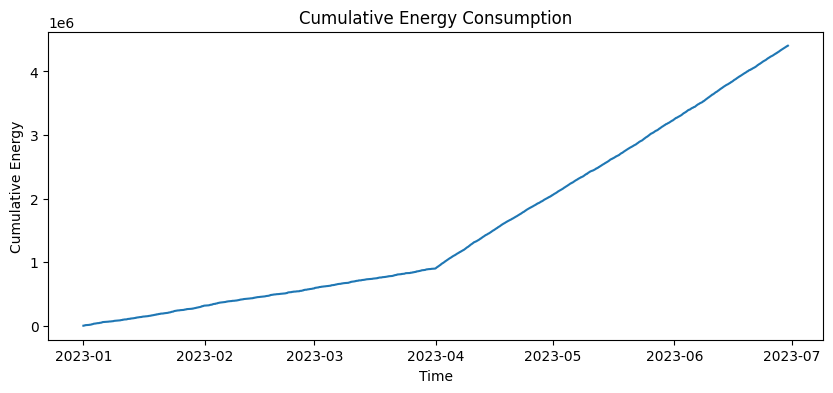

In [23]:
df['cumulative_energy'] = df['total_power'].cumsum()

plt.figure(figsize=(10,4))
plt.plot(df['cumulative_energy'])
plt.title("Cumulative Energy Consumption")
plt.xlabel("Time")
plt.ylabel("Cumulative Energy")
plt.show()

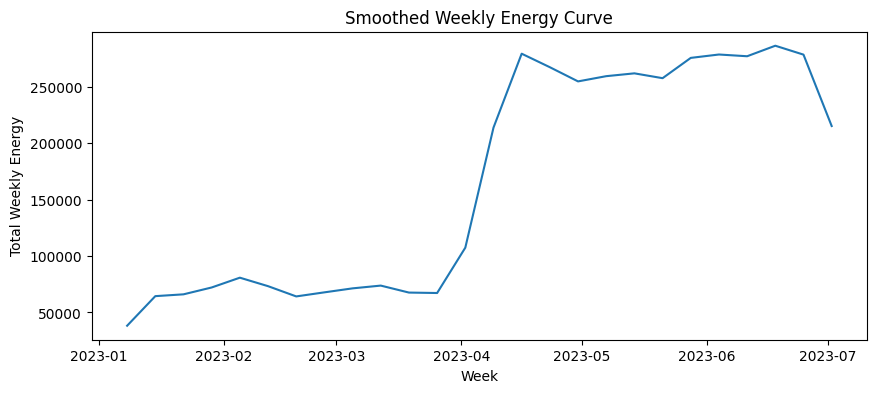

In [24]:
weekly_energy = df['total_power'].resample('W').sum()

plt.figure(figsize=(10,4))
plt.plot(weekly_energy.rolling(2).mean())
plt.title("Smoothed Weekly Energy Curve")
plt.xlabel("Week")
plt.ylabel("Total Weekly Energy")
plt.show()

In [40]:
peak_time = df['total_power'].idxmax()
peak_value = df['total_power'].max()

print("Peak occurred at:", peak_time)
print("Peak value:", peak_value)


Peak occurred at: 2023-05-15 10:00:00
Peak value: 3757
Peak occurred at: 2023-05-15 10:00:00
Peak value: 3757


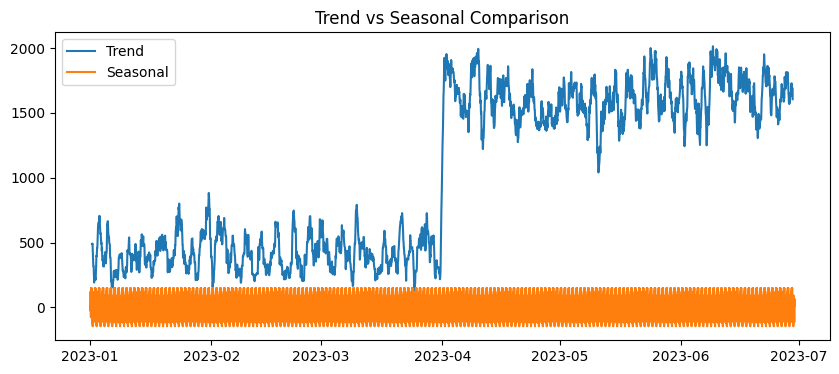

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df['total_power'], model='additive', period=24)

plt.figure(figsize=(10,4))
plt.plot(decomp.trend, label="Trend")
plt.plot(decomp.seasonal, label="Seasonal")
plt.legend()
plt.title("Trend vs Seasonal Comparison")
plt.show()

In [9]:
df = pd.read_csv("energy_data.xls")

df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

In [33]:
months = df.index.month.unique()

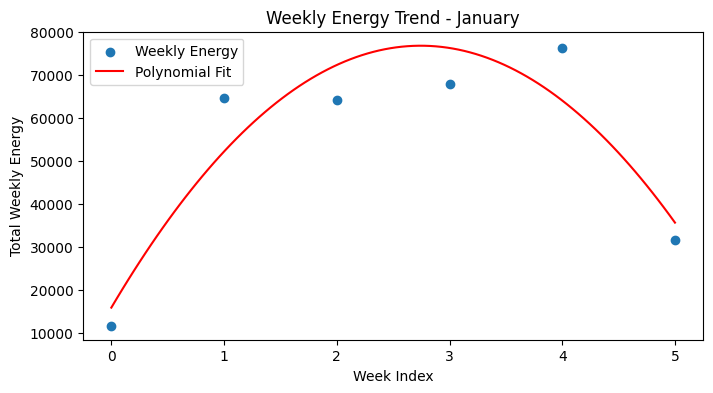

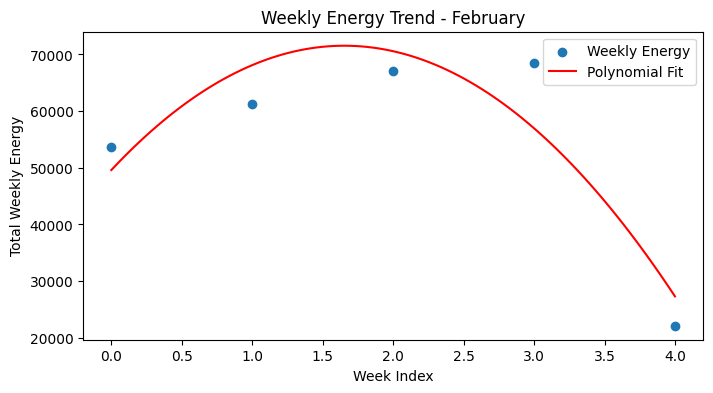

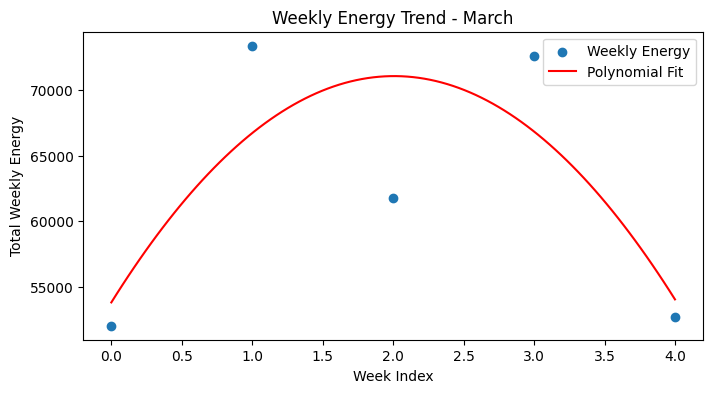

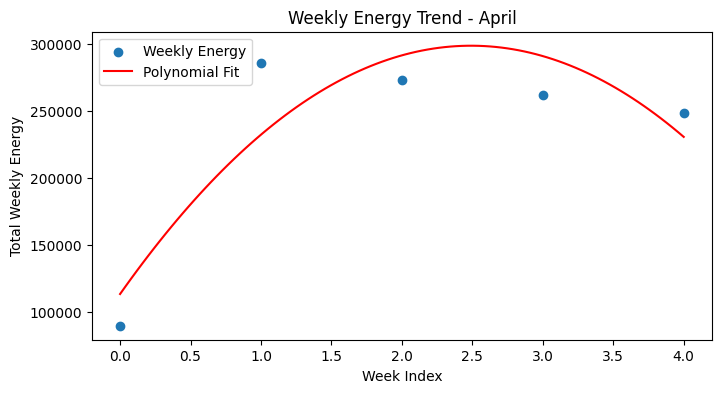

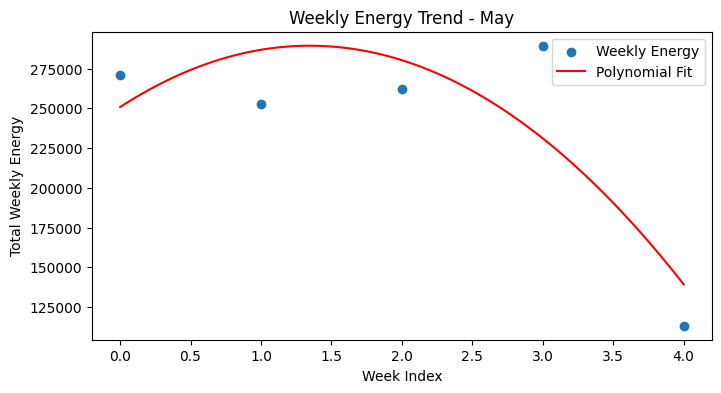

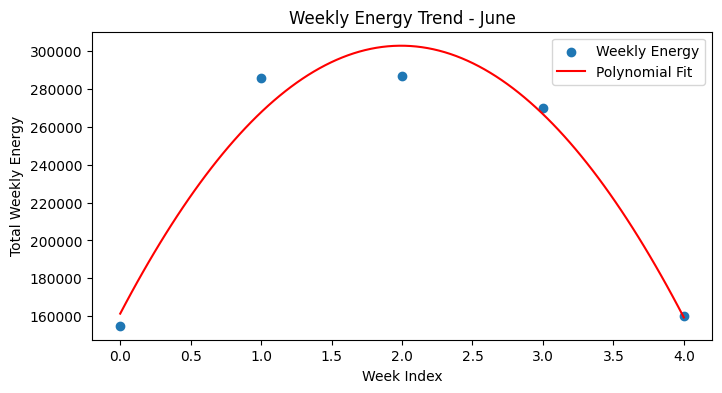

In [34]:
for month in months:
    
    # Filtered one month
    month_data = df[df.index.month == month]
    
    # Weekly total energy (sum)
    weekly_energy = month_data['total_power'].resample('W').sum()
    
    # Created numeric x-axis for polynomial fitting
    x = np.arange(len(weekly_energy))
    y = weekly_energy.values
    
    # Fit polynomial curve (degree 2)
    coeffs = np.polyfit(x, y, 2)
    poly = np.poly1d(coeffs)
    
    # to Generate smooth curve
    x_smooth = np.linspace(x.min(), x.max(), 100)
    y_smooth = poly(x_smooth)
    
    # Plot
    plt.figure(figsize=(8,4))
    plt.scatter(x, y, label="Weekly Energy")
    plt.plot(x_smooth, y_smooth, color='red', label="Polynomial Fit")
    month_name = month_data.index.strftime('%B')[0]
    plt.title(f"Weekly Energy Trend - {month_name}")
    plt.title(f"Weekly Energy Trend - {month_name}")
    plt.xlabel("Week Index")
    plt.ylabel("Total Weekly Energy")
    plt.legend()
    plt.show()

In [43]:
weekly_mean = df['total_power'].resample('W').mean()
weekly_std = df['total_power'].resample('W').std()

efficiency_ratio = weekly_mean / weekly_std
efficiency_ratio.head()

timestamp
2023-01-01    0.719348
2023-01-08    0.642932
2023-01-15    0.608779
2023-01-22    0.619077
2023-01-29    0.665345
Freq: W-SUN, Name: total_power, dtype: float64

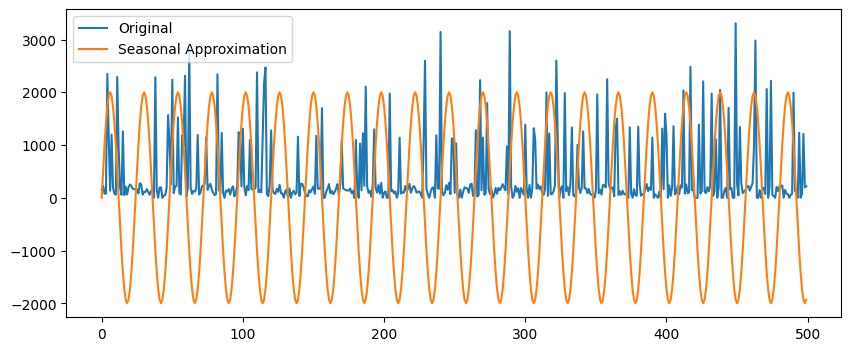

In [35]:
t = np.arange(len(df))
y = df['total_power'].values


freq = 2 * np.pi / 24
sin_curve = np.sin(freq * t)

plt.figure(figsize=(10,4))
plt.plot(y[:500], label="Original")
plt.plot(2000*sin_curve[:500], label="Seasonal Approximation")
plt.legend()
plt.show()

In [48]:
monthly_device = df[['fridge','ac','lights','microwave']].resample('ME').sum()

monthly_device["Dominant_Appliance"] = monthly_device.idxmax(axis=1)

monthly_device

,fridge,ac,lights,microwave,Dominant_Appliance
timestamp,,,,,
2023-01-31,66205,145352,24451,80380,ac
2023-02-28,59762,128018,21479,63317,ac
2023-03-31,66736,141185,23770,80791,ac
2023-04-30,62887,995819,22118,76818,ac
2023-05-31,65461,1025761,23745,73367,ac
2023-06-30,60294,991513,22483,83767,ac
